# Machine Learning in Time Series Analysis for Power Energy Usage Prediction
Name : Muhammad Anandha Fritama | Email : anandha.fritama@gmail.com

## Machine Learning Workflow
1. Setup Library
2. Setup Datasets
3. Setup Directory & Plotting Data
4. Pre-Processing
5. Creating Machine Learning Architecture
6. Compile & Training
7. Ploting
8. Testing & Prediction & Evaluation

### Setup Library

In [3]:
import numpy as nmp
import pandas as pds
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tfl
import seaborn as sns

### Setup Datasets

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Change gdrive path to your dataset path

In [10]:
data_latih = pds.read_csv('/content/gdrive/MyDrive/Dataset_Time_Series/energydata_complete.csv', parse_dates=['date'], index_col='date')
data_latih

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [11]:
data_latih['minute'] = data_latih.index.minute
data_latih['hour'] = data_latih.index.hour
data_latih['day_of_week'] = data_latih.index.dayofweek
data_latih['day_of_month'] = data_latih.index.day
data_latih['month'] = data_latih.index.month
data_latih

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,minute,hour,day_of_week,day_of_month,month
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,0,17,0,11,1
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,10,17,0,11,1
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,20,17,0,11,1
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,30,17,0,11,1
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,40,17,0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,20,17,4,27,5
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,30,17,4,27,5
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,40,17,4,27,5


### Setup Directory & Plotting Data

In [12]:
data_latih.isnull().sum()

Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
rv1             0
rv2             0
minute          0
hour            0
day_of_week     0
day_of_month    0
month           0
dtype: int64

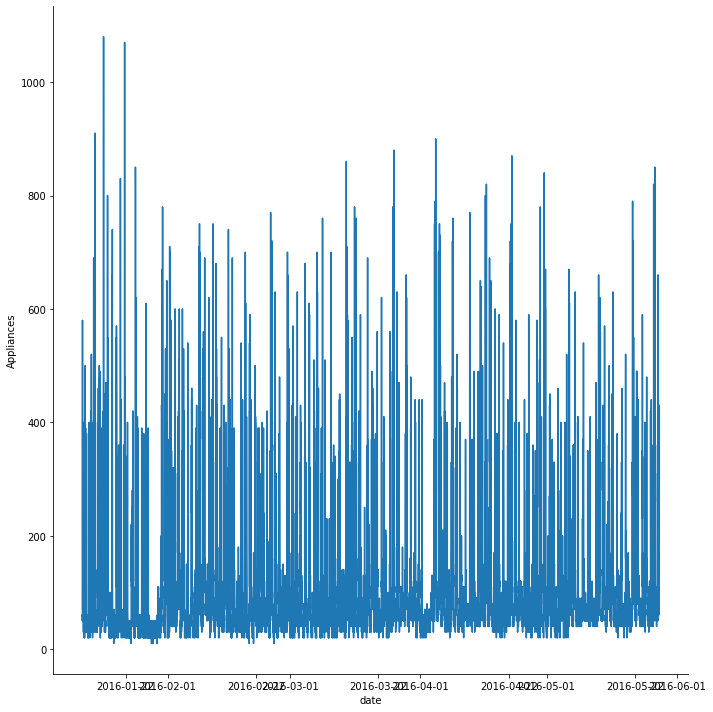

In [13]:
sns.relplot(data=data_latih, x="date", y="Appliances", kind="line", height=10)

In [14]:
train_size = int(len(data_latih) * 0.8)
train, test = data_latih.iloc[0:train_size], data_latih.iloc[train_size:len(data_latih)]

### Pre-Processing

In [15]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()
apli_transformer = transformer.fit(train[['Appliances']])

train['Appliances'] = apli_transformer.transform(train[['Appliances']])

test['Appliances'] = apli_transformer.transform(test[['Appliances']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


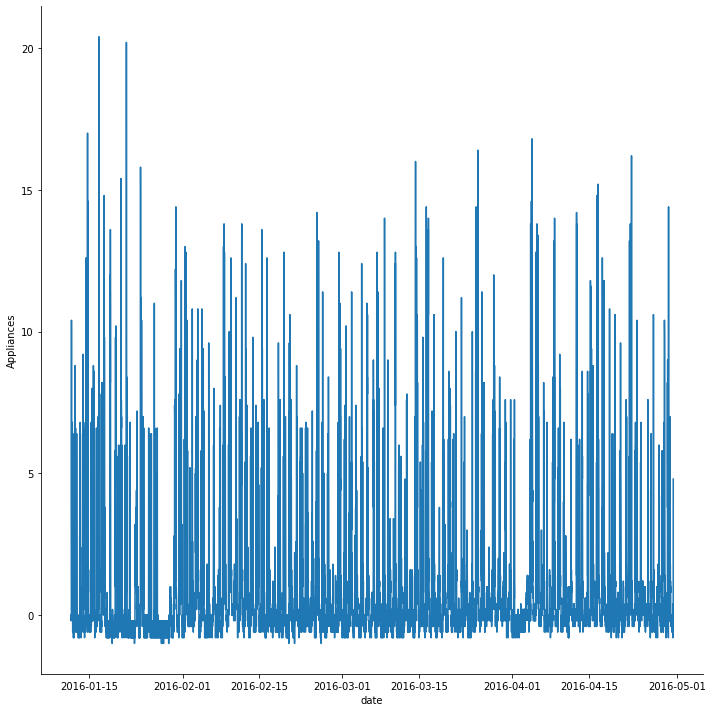

In [16]:
sns.relplot(data=train, x="date", y="Appliances", kind="line", height=10)

In [17]:
minMae_Train = (train['Appliances'].max() - train['Appliances'].min()) * 10/100
minMae_Train

2.14

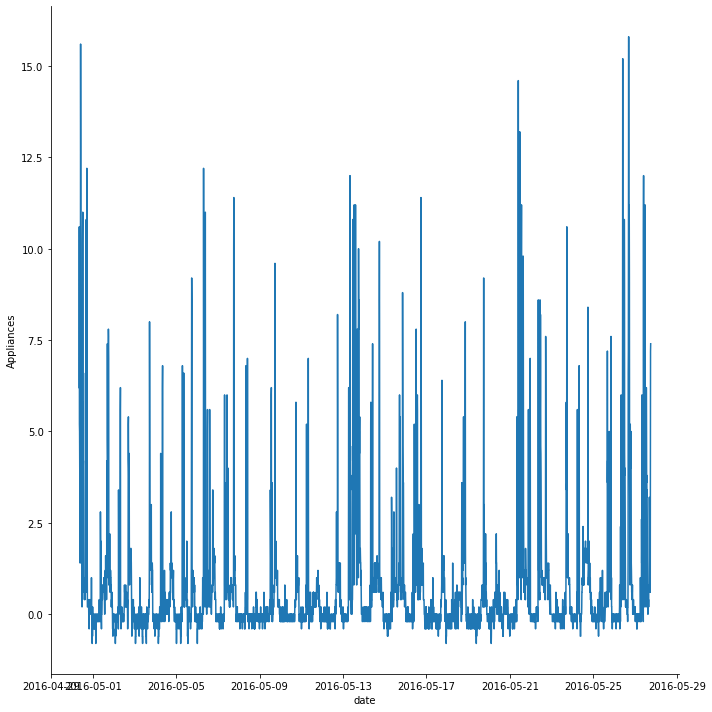

In [18]:
sns.relplot(data=test, x="date", y="Appliances", kind="line", height=10)

In [19]:
minMae_Test = (test['Appliances'].max() - test['Appliances'].min()) * 10/100
minMae_Test

1.66

In [20]:
scale_col = ['T1',	'RH_1',	'T2',	'RH_2',	'T3', 'RH_3',	'T4',	'RH_4', 'T5',	'RH_5',	'T6',	'RH_6', 'T7',	'RH_7',	'T8',	'RH_8',	'T9',	'RH_9',	'T_out',	'Press_mm_hg',	'RH_out',	'Windspeed',	'Visibility',	'Tdewpoint',	'rv1',	'rv2']
scale_transformer = transformer.fit(train[scale_col].to_numpy())

train.loc[:, scale_col] = scale_transformer.transform(
    train[scale_col].to_numpy()
)

test.loc[:, scale_col] = scale_transformer.transform(
    test[scale_col].to_numpy()
)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [22]:
def split_data(x, y, time_steps=1):
    xs, ys = [], []
    for i in range(len(x) - time_steps):
        v = x.iloc[i:(i + time_steps)].values
        xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return nmp.array(xs), nmp.array(ys)

x_train, y_train = split_data(train, train.Appliances, 10)
x_test, y_test = split_data(test, test.Appliances, 10)

print(x_train.shape, y_train.shape)

(15778, 10, 33) (15778,)


### Creating Machine Learning Architecture

In [23]:
model = tfl.keras.models.Sequential([
    tfl.keras.layers.Bidirectional(tfl.keras.layers.LSTM(128,return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[-1]))),
    tfl.keras.layers.LSTM(128, return_sequences=False),
    tfl.keras.layers.Dropout(rate=0.2),
    tfl.keras.layers.Dense(60, activation="relu"),
    tfl.keras.layers.Dense(60, activation="relu"),
    tfl.keras.layers.Dense(1)
])

### Compile & Training

In [24]:
optimizer = tfl.keras.optimizers.SGD(learning_rate=0.001, momentum=0.99)
model.compile(loss=tfl.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [25]:
minMae_Train = (train['Appliances'].max() - train['Appliances'].min()) * 10/100
minMae_Train

2.14

In [26]:
minMae_Test = (test['Appliances'].max() - test['Appliances'].min()) * 10/100
minMae_Test

1.66

In [28]:
class my_allback(tfl.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 2.14 and logs.get('val_mae') < 1.66):
            print("MAE Below 10% of Data Scale")

    def on_train_end(self, epoch, logs={}):
        print('Done')

callbacks = my_allback()

In [29]:
hasil = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=[x_test,y_test] ,validation_split=0.2, callbacks = callbacks, shuffle=False)

Epoch 1/10
395/395 [==============================] - 28s 53ms/step - loss: 0.7121 - mae: 1.0273 - val_loss: 0.5890 - val_mae: 0.9052
Epoch 2/10
395/395 [==============================] - 21s 52ms/step - loss: 0.6817 - mae: 0.9878 - val_loss: 0.5835 - val_mae: 0.8992
Epoch 3/10
395/395 [==============================] - 19s 49ms/step - loss: 0.6167 - mae: 0.9254 - val_loss: 0.6672 - val_mae: 1.0956
Epoch 4/10
395/395 [==============================] - 19s 49ms/step - loss: 0.6311 - mae: 0.9411 - val_loss: 0.5992 - val_mae: 0.8608
Epoch 5/10
395/395 [==============================] - 21s 53ms/step - loss: 0.7461 - mae: 1.0924 - val_loss: 0.6269 - val_mae: 0.9867
Epoch 6/10
395/395 [==============================] - 26s 66ms/step - loss: 0.7317 - mae: 1.0606 - val_loss: 0.6168 - val_mae: 0.9111
Epoch 7/10
395/395 [==============================] - 20s 50ms/step - loss: 0.6939 - mae: 1.0019 - val_loss: 0.5926 - val_mae: 0.8848
Epoch 8/10
395/395 [==============================] - 20s 50ms

### Plotting

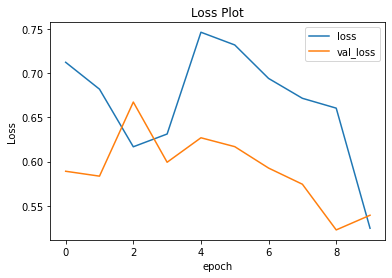

In [30]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

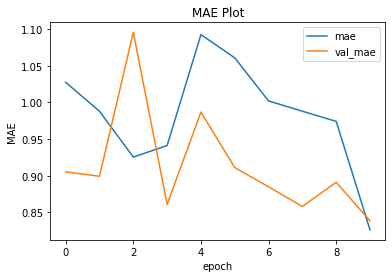

In [31]:
plt.plot(hasil.history['mae'])
plt.plot(hasil.history['val_mae'])
plt.title('MAE Plot')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['mae', 'val_mae'], loc='upper right')
plt.show()

### Testing & Prediction & Evaluation

In [42]:
def split_data_prediction(x, y, time_steps=1):
    xs, ys = [], []
    for i in range(len(x) - time_steps):
        v = x[i:(i + time_steps)]
        xs.append(v)
        ys.append(y[i + time_steps])
    return nmp.array(xs), nmp.array(ys)

x_test_final, y_test_final = split_data_prediction(x_test, y_test, 1)
prediction = model.predict(x_test_final[1])
print(prediction)
print(y_test_final[1])

[[7.7238436]]
7.4


Actual Value = 7.4
Predicted Value = 7.72